# Trabajo Práctico 1: Modelos Predictivos en SciKit-Learn
## Avanzado Tecnologías Exponenciales 2023

Alumnos:
- Tomás "Blur" S.
- Román Alexander S.
- Álvaro Agustín S.

Dependencies:
- Seaborn: Display data
- Pandas: Handle data
- Scikit-Learn: Train model

In [4]:
%pip install seaborn
%pip install pandas
%pip install scikit-learn

^C
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import libraries:

In [30]:
import seaborn as sns
import pandas as pd
import sklearn as skl
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV, RidgeClassifierCV, LassoCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier

1. **Investigar y seleccionar un dataset que cumpla con tener entre 1000 y 10.000 muestras, 5 o más atributos numéricos y al menos un atributo categórico (Recomendación: seleccionar un atributo a predecir binario). De encontrar algún dataset sin atributos categóricos, ¿Como se podría generar uno binario a partir de los atributos numéricos? Se recomienda utilizar Kaggle para la búsqueda del dataset. Antes de avanzar con el trabajo práctico, corroborar el dataset en clase.**

https://www.kaggle.com/datasets/ahsan81/used-handheld-device-data

In [3]:
fulldata: pd.DataFrame = pd.read_csv('./used_device_data.csv')

fulldata

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


2. **Realizar un análisis exploratorio de los datos. Se recomienda utilizar gráficos para visualizar la distribución de los datos y la correlación entre los atributos. Se recomienda utilizar la librería `seaborn` para realizar los gráficos.**

C:\Users\bluro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bluro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bluro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

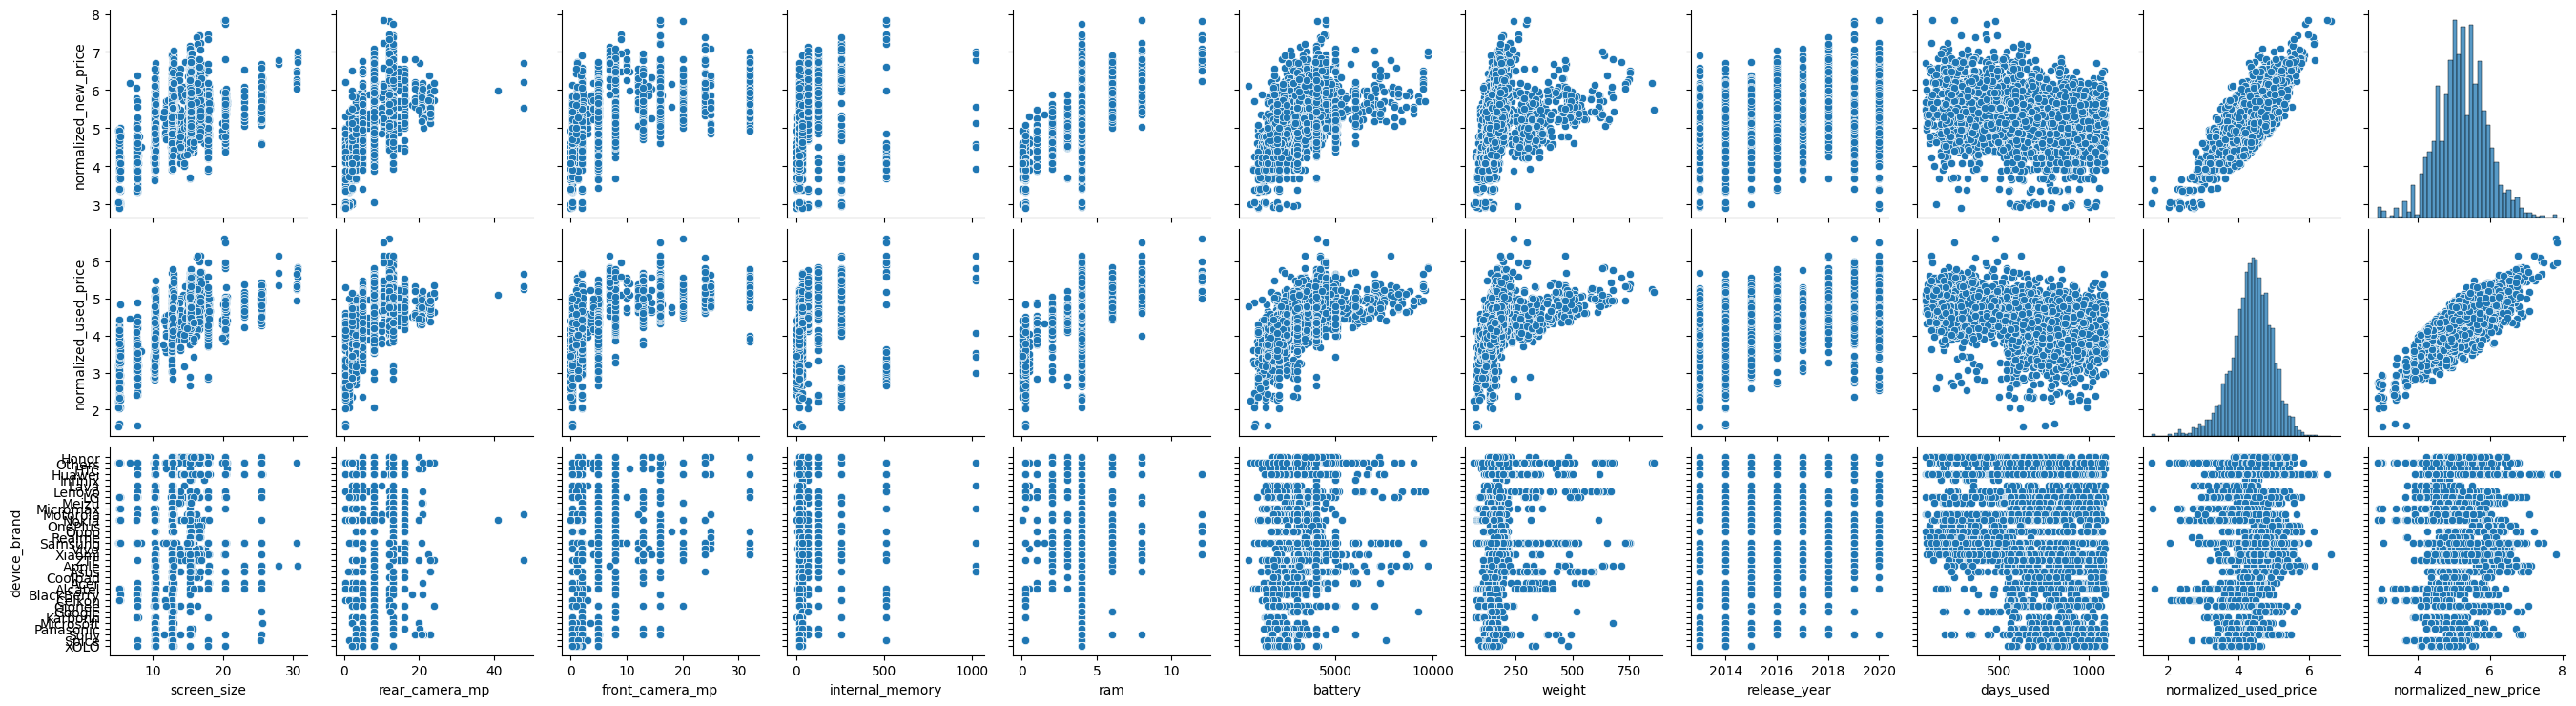

In [7]:
sns.pairplot(fulldata, y_vars=['normalized_new_price', 'normalized_used_price', 'device_brand'])

3. **Como resultado del análisis exploratorio, seleccionar un atributo categórico y un atributo numérico para realizar un modelo de clasificación. Se recomienda utilizar la función `LabelEncoder` de SciKit-Learn para convertir el atributo categórico a numérico.**

Como atributo categorico usaremos `device_brand` y como atributo numérico usaremos `normalized_used_price`.

In [5]:
# Aceptamos su recomendación gran Chona :pray: :pray:

leDB = preprocessing.LabelEncoder()
leOS = preprocessing.LabelEncoder()
le4g = preprocessing.LabelEncoder()
le5g = preprocessing.LabelEncoder()

leDB.fit(fulldata['device_brand'])
leOS.fit(fulldata['os'])
le4g.fit(fulldata['4g'])
le5g.fit(fulldata['5g'])

fulldata['device_brand'] = leDB.transform(fulldata['device_brand'])
fulldata['os'] = leOS.transform(fulldata['os'])
fulldata['4g'] = le4g.transform(fulldata['4g'])
fulldata['5g'] = le5g.transform(fulldata['5g'])

display(fulldata)

# El dataset contiene valores NaN, por lo que eliminaremos esas filas
fulldata = fulldata.dropna()
fulldata

C:\Users\bluro\AppData\Local\Temp\ipykernel_21516\1168231106.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fulldata['device_brand'] = leDB.transform(fulldata['device_brand'])
C:\Users\bluro\AppData\Local\Temp\ipykernel_21516\1168231106.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fulldata['os'] = leOS.transform(fulldata['os'])
C:\Users\bluro\AppData\Local\Temp\ipykernel_21516\1168231106.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,10,0,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,10,0,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,10,0,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,10,0,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,10,0,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,2,3,15.27,1,0,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933
3450,3,0,15.24,1,0,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,1,0,15.80,1,0,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,1,0,15.80,1,0,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,10,0,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,10,0,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,10,0,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,10,0,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,10,0,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,2,3,15.27,1,0,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933
3450,3,0,15.24,1,0,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,1,0,15.80,1,0,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,1,0,15.80,1,0,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


4. **Realizar una partición de los datos en conjuntos de entrenamiento y test. La proporción con la cual hacen esta partición es libre. Se recomienda utilizar la función `train_test_split` de SciKit-Learn.**

In [6]:
# Aceptamos su recomendación gran Chona :pray: :pray:

x_num: pd.DataFrame = fulldata.drop('normalized_used_price', axis = 1)
y_num: pd.DataFrame = fulldata['normalized_used_price']

x_cat: pd.DataFrame = fulldata.drop(['device_brand', 'days_used', 'normalized_used_price'], axis = 1)
y_cat: pd.DataFrame = fulldata['device_brand']

x_train_num, x_test_num, y_train_num, y_test_num = train_test_split(x_num, y_num)
x_train_cat, x_test_cat, y_train_cat, y_test_cat = train_test_split(x_cat, y_cat)

5. **Para el atributo numérico a predecir seleccionado:**

- **Realizar un modelo de regresión lineal utilizando la clase `LinearRegression` de SciKit-Learn.**
- **Realizar un modelo de Árbol de Decisión utilizando la clase `DecisionTreeRegressor` de SciKit-Learn. Seleccionar hiperparámetros que les parezca mejoren el modelo.**

**Responder:**
**¿Que formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?**

**Sugerencia: Aprovechar los conceptos de validación y de validación cruzada para evaluar los modelos. Pueden utilizar la función `cross_val_score` de SciKit-Learn para evaluar los modelos.**

**Se recomienda utilizar la función `cross_val_score` de SciKit-Learn para evaluar los modelos.**

In [7]:
cv = 5
display(cross_val_score(LinearRegression(copy_X=True), x_num, y_num, cv = cv))
display(cross_val_score(DecisionTreeRegressor(), x_num, y_num, cv = cv))

array([0.85170096, 0.81141163, 0.82677305, 0.78965506, 0.84817911])

array([0.72531917, 0.62806433, 0.6462433 , 0.67625324, 0.7113393 ])

Usando cross_val_score para determinar que modelo es mejor, podemos ver que el modelo de regresión lineal es mejor que el de árbol de decisión.
Ahora hay que ver si cambiando hiperparámetros podemos mejorar el modelo de árbol de decisión, de lo contrario, nos quedamos con el de regresión lineal.
Para esto, vamos a usar la clase `GridSearchCV`.

In [9]:
param_grid = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "splitter": ["best", "random"],
    "min_samples_split": [56, 58, 60, 62, 64], # Originalmente [2, 4, 5, 8, 10, 16, 20], al ser el valor maximo aumentamos el rango. Luego acercamos los valores a 64 -> 60
    "max_features": [None, "sqrt", "log2", .77, .78, .79, .8, .81, .82, .83], # Originalmente [None, "sqrt", "log2", .2, .4, .6, .8, 1.0], al ser .8, acercamos los valores.
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = cv)
grid_search.fit(x_num, y_num)
grid_search.best_params_

{'criterion': 'squared_error',
 'max_features': 0.83,
 'min_samples_split': 64,
 'splitter': 'best'}

Luego de fittear el GridSearchCV varias veces, max_features y min_samples_split variaban los valores de resultado, por lo que hicimos un promedio y quedaron en .8 y 60 respectivamente.
Usamos estos parametros para `cross_val_score` y vemos si es mejor que el modelo de regresión lineal:

In [12]:
cross_val_score(DecisionTreeRegressor(criterion="squared_error", max_features=.8, min_samples_split=60, splitter="best"), x_num, y_num, cv = cv)

array([0.82309013, 0.71444401, 0.78059715, 0.77096015, 0.80992154])

Aunque los valores mejoraron, el modelo de regresión lineal sigue siendo mejor. Por lo tanto, nos quedamos con el modelo de regresión lineal.

In [17]:
lr = LinearRegression()
lr.fit(x_train_num, y_train_num)
lr.score(x_test_num, y_test_num)

0.8135723613601668

Respuesta:

6. **Para el atributo categórico a predecir seleccionado**

- **Realizar un modelo de clasificación utilizando la clase `LogisticRegression` de SciKit-Learn.**
- **Realizar un modelo de clasificación utilizando la clase `DecisionTreeClassifier` de SciKit-Learn.**

**Responder las mismas preguntas que en el punto 5 para este caso.**

In [8]:
display(cross_val_score(LogisticRegression(), x_cat, y_cat, cv = cv))
display(cross_val_score(DecisionTreeClassifier(), x_cat, y_cat, cv = cv))

C:\Users\bluro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bluro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

array([0.18894009, 0.1827957 , 0.11674347, 0.16153846, 0.17846154])

array([0.32104455, 0.22580645, 0.22734255, 0.20769231, 0.31230769])

eh... ignorando el hecho de que el score es muy bajo, busquemos hiperparametros...

In [ ]:
param_grid = {
    "penalty": ["l1", "l2", None],
    "tol": [1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    "C": [0.1, 0.5, 1.0, 1.5, 2.0],
    "fit_intercept": [True, False],
    "solver": ["liblinear", "newton-cholesky"]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv = cv)
grid_search.fit(x_cat, y_cat)
grid_search.best_params_

Después de correr esto en colab, obtenemos que los mejores parametros son:
```json
{'C': 0.1,
 'fit_intercept': False,
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 0.001}
```

Ahora toca hacer lo mismo con DecisionTreeClassifier.

In [9]:
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "min_samples_split": [2, 4, 5, 8, 10, 16, 20],
    "max_features": [None, "sqrt", "log2", .2, .4, .6, .8, 1.0]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = cv)
grid_search.fit(x_cat, y_cat)
grid_search.best_params_

{'criterion': 'gini',
 'max_features': None,
 'min_samples_split': 2,
 'splitter': 'best'}

Comparemos los resultados del `cross_val_score` de ambos modelos con estos hiperparametros:

In [10]:
display(cross_val_score(LogisticRegression(C=0.1, fit_intercept=True, penalty="l2", solver="liblinear", tol=0.0001), x_cat, y_cat, cv = cv))
display(cross_val_score(DecisionTreeClassifier(criterion="gini", max_features=None, min_samples_split=2, splitter="best"), x_cat, y_cat, cv = cv))

array([0.20737327, 0.21044547, 0.16589862, 0.20769231, 0.17230769])

array([0.32258065, 0.22119816, 0.22887865, 0.22769231, 0.30615385])

In [11]:
dtc = DecisionTreeClassifier(criterion="gini", max_features=None, min_samples_split=2, splitter="best")
dtc.fit(x_train_cat, y_train_cat)
dtc.score(x_test_cat, y_test_cat)

0.4201474201474201

Respuesta:

7. **Comparar distintos métodos de validación cruzada. ¿Que ventajas y desventajas tiene cada uno?**

8. **Escribir una conclusión sobre el trabajo realizado.**

Por ahora, en caso de que leas este commit especifico, mi conclusión es que:
1. Hacer el TP me gustó mucho más de lo que creí.
2. Me entretuve bastante en la viciada que pegué.
3. Quizas el atributo categorico que elegimos a predecir es el mejor de los que tenía este dataset, pero no tiene mucho sentido.
4. Hablando de datasets, no pudimos usar el dataset de Among Us.
5. A copilot le gustá mucho decir ":P" al final de mis oraciones cortas. *:P*

## Bonus
- **Investigar los métodos GridSearch y RandomSearch para la búsqueda de hiperparámetros. Utilizarlos para encontrar los mejores hiperparámetros para los modelos.**

Resulta ser que hicimos esto en el punto 5 y 6, pero no lo sabíamos, bonus gratis. :P

- **Para ya sea el atributo categórico como para el numérico, elegir otro modelo de clasificación o regresión que no haya sido utilizado anteriormente. Entrenar el modelo y comparar los resultados con los obtenidos anteriormente.**

Para el categorico vamos a estar probando el modelo RandomForestClassifier, GradientBoostingClassifier, y RidgeClassifierCV; y para el numerico vamos a estar probando el modelo RandomForestRegressor, GradientBoostingRegressor, RidgeCV y LassoCV.

También, aprovechamos para usar RandomSearchCV que no habíamos usado antes. Los resultados obtenidos no serán igual de buenos, pero es más rápido, y digamos que uno solo tiene tantas horas en un día, y usar GridSearchCV es demasiado tiempo para un simple TP. Llevo corriendo el primer GridSearch de este bonus hace media hora y, segun mis calculos ☝️🤓, le faltan 2 horas y media, y el segundo debería tardar 8 horas.

In [21]:
display(cross_val_score(RandomForestClassifier(), x_cat, y_cat, cv = cv))
display(cross_val_score(GradientBoostingClassifier(), x_cat, y_cat, cv = cv))
display(cross_val_score(RidgeClassifierCV(), x_cat, y_cat, cv = cv))

array([0.32411674, 0.2734255 , 0.26420891, 0.34      , 0.32461538])

array([0.34408602, 0.29032258, 0.2718894 , 0.33230769, 0.28307692])

array([0.19047619, 0.19508449, 0.17204301, 0.19846154, 0.14153846])

Descartemos RidgeClassifierCV y sigamos con RandomForestClassifier y GradientBoostingClassifier.

In [ ]:
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "criterion": ["gini", "entropy", "log_loss"],
    "min_samples_split": [2, 4, 5, 8, 10, 16, 20],
    "max_features": [None, "sqrt", "log2", .2, .4, .6, .8, 1.0]
}

grid_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv = cv)
grid_search.fit(x_cat, y_cat)
grid_search.best_params_

Resultados en colab:
```json
{'n_estimators': 500,
 'min_samples_split': 8,
 'max_features': None,
 'criterion': 'gini'}
```

In [ ]:
param_grid = {
    "learning_rate": [0.1, 0.5, 1.0, 1.5, 2.0],
    "n_estimators": [100, 200, 300, 400, 500],
    "criterion": ["friedman_mse", "squared_error"],
    "min_samples_split": [2, 4, 5, 8, 10, 16, 20],
    "max_features": [None, "sqrt", "log2", .2, .4, .6, .8, 1.0],
    "tol": [1e-4, 1e-3, 1e-2, 1e-1, 1e0]
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = cv)
grid_search.fit(x_cat, y_cat)
grid_search.best_params_

Luego de 48 minutos, los resultados en colab:
```json
{'tol': 1.0,
 'n_estimators': 400,
 'min_samples_split': 8,
 'max_features': 0.4,
 'learning_rate': 0.1,
 'criterion': 'friedman_mse'}
```

In [33]:
display(cross_val_score(RandomForestClassifier(n_estimators=500, min_samples_split=8, max_features=None, criterion="gini"), x_cat, y_cat, cv = cv))
display(cross_val_score(GradientBoostingClassifier(tol=1.0, n_estimators=400, min_samples_split=8, max_features=.4, learning_rate=.1, criterion="friedman_mse"), x_cat, y_cat, cv = cv))

array([0.35791091, 0.28725038, 0.26728111, 0.35538462, 0.33384615])

array([0.36866359, 0.30261137, 0.28110599, 0.36769231, 0.34769231])

Valio la pena esperar por GradientBoostingClassifier.

In [34]:
gbc = GradientBoostingClassifier(tol=1.0, n_estimators=400, min_samples_split=8, max_features=.4, learning_rate=.1, criterion="friedman_mse")
gbc.fit(x_train_cat, y_train_cat)
gbc.score(x_test_cat, y_test_cat)

0.5577395577395577

Podemos ver que usar GradientBoostingClassifier nos dió una mejora de 0,1375921375921376 sobre DecisionTreeClassifier. Valió la pena esperar, realmente.


In [23]:
display(cross_val_score(RandomForestRegressor(), x_num, y_num, cv = cv))
display(cross_val_score(GradientBoostingRegressor(), x_num, y_num, cv = cv))
display(cross_val_score(RidgeCV(), x_num, y_num, cv = cv))
display(cross_val_score(LassoCV(), x_num, y_num, cv = cv))

array([0.85399848, 0.81838969, 0.82496986, 0.80836048, 0.85890222])

array([0.85463695, 0.82245604, 0.83688203, 0.82081695, 0.85998667])

array([0.85176441, 0.81133905, 0.82678374, 0.78967861, 0.84822301])

array([0.6478898 , 0.54706829, 0.56768403, 0.62001707, 0.63018447])

Automaticamente descartamos LassoCV y RidgeCV (que aunque dió bastantes buenos resultados, no se puede seguir mejorando), y nos quedamos con RandomForestRegressor, GradientBoostingRegressor y RidgeCV.

In [25]:
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],
    "min_samples_split": [2, 4, 5, 8, 10, 16, 20],
    "max_features": ["sqrt", "log2", .2, .4, .6, .8, 1.0]
}

grid_search = RandomizedSearchCV(RandomForestRegressor(), param_grid, cv = cv)
grid_search.fit(x_num, y_num)
grid_search.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'max_features': 0.6,
 'criterion': 'friedman_mse'}

In [28]:
param_grid = {
    "loss": ["squared_error", "absolute_error", "huber", "quantile"],
    "learning_rate": [0.1, 0.5, 1.0, 1.5, 2.0],
    "n_estimators": [100, 200, 300, 400, 500],
    "criterion": ["friedman_mse", "squared_error"],
    "min_samples_split": [2, 4, 5, 8, 10, 16, 20],
    "max_features": ["sqrt", "log2", .2, .4, .6, .8, 1.0],
}

grid_search = RandomizedSearchCV(GradientBoostingRegressor(), param_grid, cv = cv)
grid_search.fit(x_num, y_num)
grid_search.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'loss': 'squared_error',
 'learning_rate': 0.1,
 'criterion': 'friedman_mse'}

In [31]:
display(cross_val_score(RandomForestRegressor(n_estimators=400, min_samples_split=5, max_features=.6, criterion="friedman_mse"), x_num, y_num, cv = cv))
display(cross_val_score(GradientBoostingRegressor(n_estimators=400, min_samples_split=5, max_features="sqrt", loss="squared_error", learning_rate=0.1, criterion="friedman_mse"), x_num, y_num, cv = cv))

array([0.86208998, 0.82222504, 0.83302351, 0.81601855, 0.86297232])

array([0.82841826, 0.81660359, 0.83066133, 0.80712916, 0.85787668])

RandomForestRegressor gana! 

In [32]:
rfr = RandomForestRegressor(n_estimators=400, min_samples_split=5, max_features=.6, criterion="friedman_mse")
rfr.fit(x_train_num, y_train_num)
rfr.score(x_test_num, y_test_num)

0.8504833678860436

Obtenemos una mejora de 0,0369110065258768 con respecto al modelo de regresión lineal.

Con eso concluimos por segunda vez este TP. La verdad que fue bastante entretenido, más de lo que me imaginaba. Me habré pegado una buena viciadita a sacarle el mejor score posible, no me arrepiento. Así que espero que le haya gustado este TP estimado Chona :pray: :pray:.